# Importação dos dados e Bibliotecas

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [226]:
#Verificando encode da planilha vendas_tran.csv

with open('vendas_tran.csv') as f:
    print(f)

<_io.TextIOWrapper name='vendas_tran.csv' mode='r' encoding='cp1252'>


In [227]:
vendas_tran = pd.read_csv('vendas_tran.csv', sep=';',encoding='cp1252')
vendas_tran.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,SalesPersonId
0,9261,CA-2017-167976,11/11/2017,11/14/2017,Second Class,JL-15505,Jeremy/Lonsdale,Consumer,United States,Aberdeen,...,57401 Central,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,"25,5",3,0,"6,63",3029
1,6990,CA-2017-165099,12/11/2017,12/13/2017,First Class,DK-13375,Dennis/Kane,Consumer,United States,Abilene,...,79605 Central,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,"1,39",2,"0,8","-3,76",3032
2,201,CA-2017-105074,6/24/2017,6/29/2017,Standard Class,MB-17305,Maria/Bertelson,Consumer,United States,Akron,...,44312 East,OFF-PA-10002666,Office Supplies,Paper,Southworth 25% Cotton Linen-Finish Paper & Env...,"21,74",3,"0,2","6,8",3029
3,3201,CA-2014-164224,5/18/2014,5/20/2014,Second Class,TT-21070,Ted/Trevino,Consumer,United States,Akron,...,44312 East,FUR-FU-10000308,Furniture,Furnishings,Deflect-o Glass Clear Studded Chair Mats,"149,23",3,"0,2","3,73",3031
4,3202,CA-2014-164224,5/18/2014,5/20/2014,Second Class,TT-21070,Ted/Trevino,Consumer,United States,Akron,...,44312 East,OFF-PA-10001526,Office Supplies,Paper,Xerox 1949,"15,94",4,"0,2","5,78",3031


In [228]:
vendedor = pd.read_csv('vendedor.csv', sep=';')
vendedor.head()

,Salespersonid,SalesPersonName,SalesPersonLastName,Region
0,3029,Anna,Andreadi,West
1,3030,Chuck,Magee,East
2,3031,Kelly,Williams,Central
3,3032,Cassandra,Brandow,South


# Tratamentos de colunas e Join

In [229]:
vendedor = vendedor.rename(columns={'Salespersonid': 'SalesPersonId'})
vendedor

,SalesPersonId,SalesPersonName,SalesPersonLastName,Region
0,3029,Anna,Andreadi,West
1,3030,Chuck,Magee,East
2,3031,Kelly,Williams,Central
3,3032,Cassandra,Brandow,South


In [230]:
vendas = pd.merge(vendas_tran, vendedor, on='SalesPersonId', how='inner')
vendas

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,SubCategory,ProductName,Sales,Quantity,Discount,Profit,SalesPersonId,SalesPersonName,SalesPersonLastName,Region
0,9261,CA-2017-167976,11/11/2017,11/14/2017,Second Class,JL-15505,Jeremy/Lonsdale,Consumer,United States,Aberdeen,...,Supplies,Acme Titanium Bonded Scissors,"25,5",3,0,"6,63",3029,Anna,Andreadi,West
1,201,CA-2017-105074,6/24/2017,6/29/2017,Standard Class,MB-17305,Maria/Bertelson,Consumer,United States,Akron,...,Paper,Southworth 25% Cotton Linen-Finish Paper & Env...,"21,74",3,"0,2","6,8",3029,Anna,Andreadi,West
2,9922,CA-2014-111360,11/24/2014,11/30/2014,Standard Class,AT-10435,Alyssa/Tate,Home Office,United States,Akron,...,Binders,Acco Expandable Hanging Binders,"5,74",3,"0,7","-4,59",3029,Anna,Andreadi,West
3,9275,US-2014-134054,10/10/2014,10/10/2014,Same Day,FC-14335,Fred/Chung,Corporate,United States,Albuquerque,...,Art,"Dixon Ticonderoga Core-Lock Colored Pencils, 4...","255,85",7,0,"112,57",3029,Anna,Andreadi,West
4,9188,US-2015-130512,8/21/2015,8/25/2015,Standard Class,SM-20320,Sean/Miller,Home Office,United States,Allentown,...,Supplies,Staple remover,"3,49",2,"0,2","-0,7",3029,Anna,Andreadi,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1085,US-2016-143819,3/1/2016,3/5/2016,Standard Class,KD-16270,Karen/Daniels,Consumer,United States,Yonkers,...,Storage,Adjustable Depth Letter/Legal Cart,"362,92",2,0,"105,25",3030,Chuck,Magee,East
9990,1086,US-2016-143819,3/1/2016,3/5/2016,Standard Class,KD-16270,Karen/Daniels,Consumer,United States,Yonkers,...,Machines,Ativa V4110MDD Micro-Cut Shredder,"4899,93",7,0,"2400,97",3030,Chuck,Magee,East
9991,2146,US-2016-152051,6/25/2016,6/29/2016,Standard Class,TS-21160,Theresa/Swint,Corporate,United States,York,...,Chairs,Global Leather Highback Executive Chair with P...,"422,06",3,"0,3","-18,09",3030,Chuck,Magee,East
9992,2147,US-2016-152051,6/25/2016,6/29/2016,Standard Class,TS-21160,Theresa/Swint,Corporate,United States,York,...,Binders,GBC Wire Binding Strips,"38,09",4,"0,7","-27,93",3030,Chuck,Magee,East


In [231]:
vendas.describe()

,RowID,Quantity,SalesPersonId
count,9994.000000,9994.000000,9994.000000
mean,4997.500000,3.789574,3030.802982
std,2885.163629,2.225110,0.973741
min,1.000000,1.000000,3029.000000
25%,2499.250000,2.000000,3030.000000
50%,4997.500000,3.000000,3031.000000
75%,7495.750000,5.000000,3032.000000
max,9994.000000,14.000000,3032.000000


In [232]:
vendas.to_csv('vendas.csv', header=True, sep=';')

In [233]:
vendas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RowID                9994 non-null   int64 
 1   OrderID              9994 non-null   object
 2   OrderDate            9994 non-null   object
 3   ShipDate             9994 non-null   object
 4   ShipMode             9994 non-null   object
 5   CustomerID           9994 non-null   object
 6   CustomerName         9994 non-null   object
 7   Segment              9994 non-null   object
 8   Country              9994 non-null   object
 9   City                 9994 non-null   object
 10  State                9994 non-null   object
 11  PostalCode           9994 non-null   object
 12  ProductID            9994 non-null   object
 13  Category             9994 non-null   object
 14  SubCategory          9994 non-null   object
 15  ProductName          9994 non-null   object
 16  Sales 

# Inicio da Analise

## Quantidade de vendas por categoria

In [234]:
vendas[u'Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

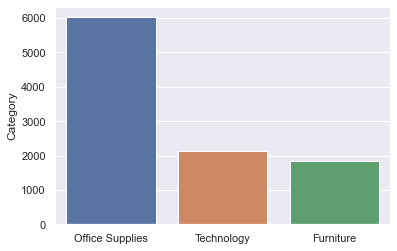

In [235]:
import seaborn as sns
sns.set(style='darkgrid')
Categoria = vendas[u'Category'].unique()
cont = vendas[u'Category'].value_counts()
sns.barplot(x=Categoria,y=cont)

## Top Vendas por Estado e Região

In [236]:
pd.set_option('display.max_rows', 30)

In [257]:
vendas.groupby('State')['Region'].value_counts().sort_values(ascending=False)

State                 Region 
California            Central    784
                      South      507
                      East       442
New York              Central    393
Texas                 Central    352
                                ... 
Idaho                 West         1
West Virginia         West         1
District of Columbia  Central      1
South Carolina        West         1
Wyoming               Central      1
Name: Region, Length: 183, dtype: int64

## Vendas por categoria e sub-categoria

In [238]:
vendas.groupby('Category')['SubCategory'].value_counts()

Category         SubCategory
Furniture        Furnishings     957
                 Chairs          617
                 Tables          319
                 Bookcases       228
Office Supplies  Binders        1523
                 Paper          1370
                 Storage         846
                 Art             796
                 Appliances      466
                 Labels          364
                 Envelopes       254
                 Fasteners       217
                 Supplies        190
Technology       Phones          889
                 Accessories     775
                 Machines        115
                 Copiers          68
Name: SubCategory, dtype: int64

In [239]:
vendas.dtypes

RowID                   int64
OrderID                object
OrderDate              object
ShipDate               object
ShipMode               object
CustomerID             object
CustomerName           object
Segment                object
Country                object
City                   object
State                  object
PostalCode             object
ProductID              object
Category               object
SubCategory            object
ProductName            object
Sales                  object
Quantity                int64
Discount               object
Profit                 object
SalesPersonId           int64
SalesPersonName        object
SalesPersonLastName    object
Region                 object
dtype: object

In [240]:
vendas2 = pd.Series(vendas["Sales"]).replace(regex=',',value='.')

vendas['Sales'] = pd.to_numeric(vendas['Sales'].replace(regex=',',value='.'))

In [241]:
vendas.dtypes

RowID                    int64
OrderID                 object
OrderDate               object
ShipDate                object
ShipMode                object
CustomerID              object
CustomerName            object
Segment                 object
Country                 object
City                    object
State                   object
PostalCode              object
ProductID               object
Category                object
SubCategory             object
ProductName             object
Sales                  float64
Quantity                 int64
Discount                object
Profit                  object
SalesPersonId            int64
SalesPersonName         object
SalesPersonLastName     object
Region                  object
dtype: object

## Valor de vendas por categoria

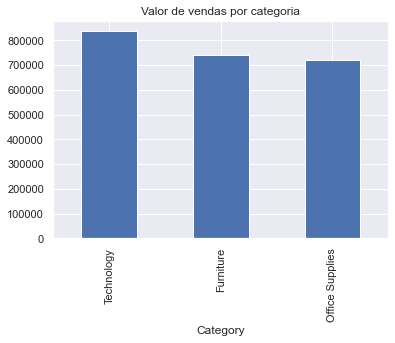

In [258]:
VendasPerCategory = vendas.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot.bar().set_title('Valor de vendas por categoria')

## Quantidade de vendas por categoria

Text(0.5, 1.0, 'Quantidade de Vendas por categoria')

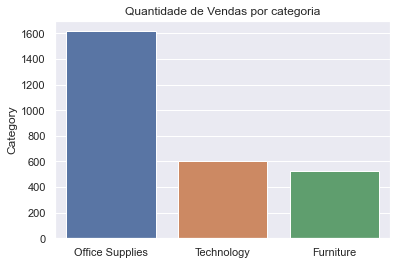

In [259]:
sns.barplot(x=Categoria,y=cont).set_title('Quantidade de Vendas por categoria')

# Oportunidades na área de Tecnologia

### Maiores valores de venda porém em pouca quantidade

array([<AxesSubplot:ylabel='Region'>], dtype=object)

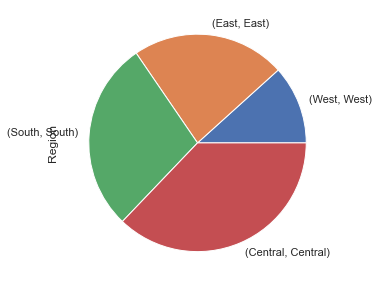

In [266]:
df = vendas[vendas['Category']=='Technology']
df.groupby(u'Region')['Region'].value_counts().sort_values().plot.pie(subplots=True,figsize=(5, 5))

<AxesSubplot:ylabel='Region,SubCategory'>

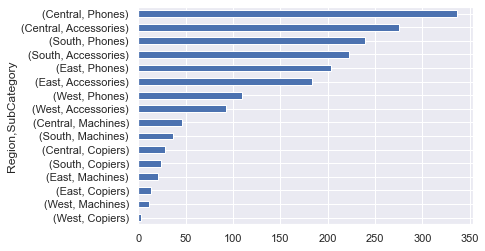

In [267]:
df = vendas[vendas['Category']=='Technology']
df.groupby(u'Region')['SubCategory'].value_counts().sort_values().plot.barh()

## Produtos com maior saida em tecnologia

<AxesSubplot:ylabel='SubCategory'>

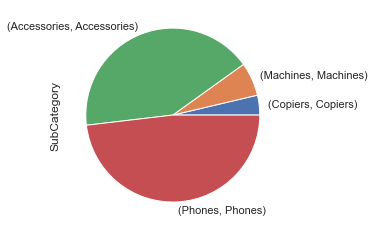

In [271]:
df = vendas[vendas['Category']=='Technology']
df.groupby(u'SubCategory')['SubCategory'].value_counts().sort_values().plot.pie()

## Vendas por Região

<AxesSubplot:ylabel='Category'>

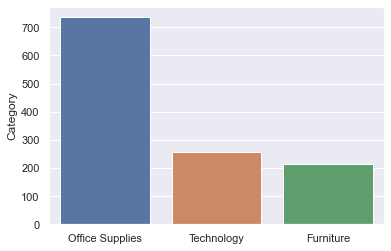

In [272]:
west = vendas[vendas['Region']=='West']
Categoria = west[u'Category'].unique()
cont = west[u'Category'].value_counts()
sns.barplot(x=Categoria,y=cont)

<AxesSubplot:ylabel='Category'>

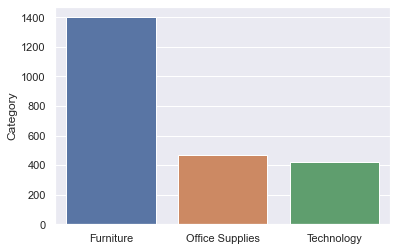

In [273]:
East = vendas[vendas['Region']=='East']
Categoria = East[u'Category'].unique()
cont = East[u'Category'].value_counts()
sns.barplot(x=Categoria,y=cont)

<AxesSubplot:ylabel='Category'>

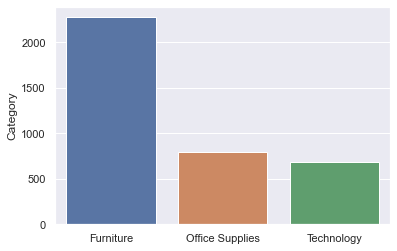

In [274]:
Central = vendas[vendas['Region']=='Central']
Categoria = Central[u'Category'].unique()
cont = Central[u'Category'].value_counts()
sns.barplot(x=Categoria,y=cont)

<AxesSubplot:ylabel='Category'>

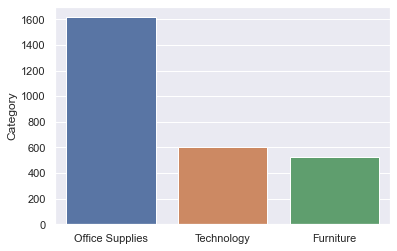

In [275]:
South = vendas[vendas['Region']=='South']
Categoria = South[u'Category'].unique()
cont = South[u'Category'].value_counts()
sns.barplot(x=Categoria,y=cont)

## Correlações

In [276]:
correlation = vendas.drop('RowID',axis=1).corr()
correlation.style.background_gradient(cmap= 'coolwarm')

,Sales,Quantity,SalesPersonId
Sales,1.000000,0.200795,0.007489
Quantity,0.200795,1.000000,-0.005419
SalesPersonId,0.007489,-0.005419,1.000000


<AxesSubplot:ylabel='Density'>

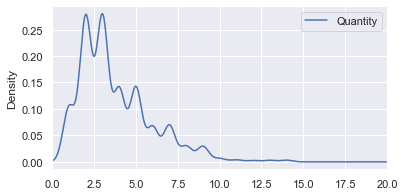

In [252]:
vendas.plot.density(y='Quantity',xlim=[0,20],figsize=[6,3])